In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
df=pd.read_csv(r"C:\Users\Darshan\Downloads\laptop_prices.csv")
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [4]:
df.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [6]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [7]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

In [8]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

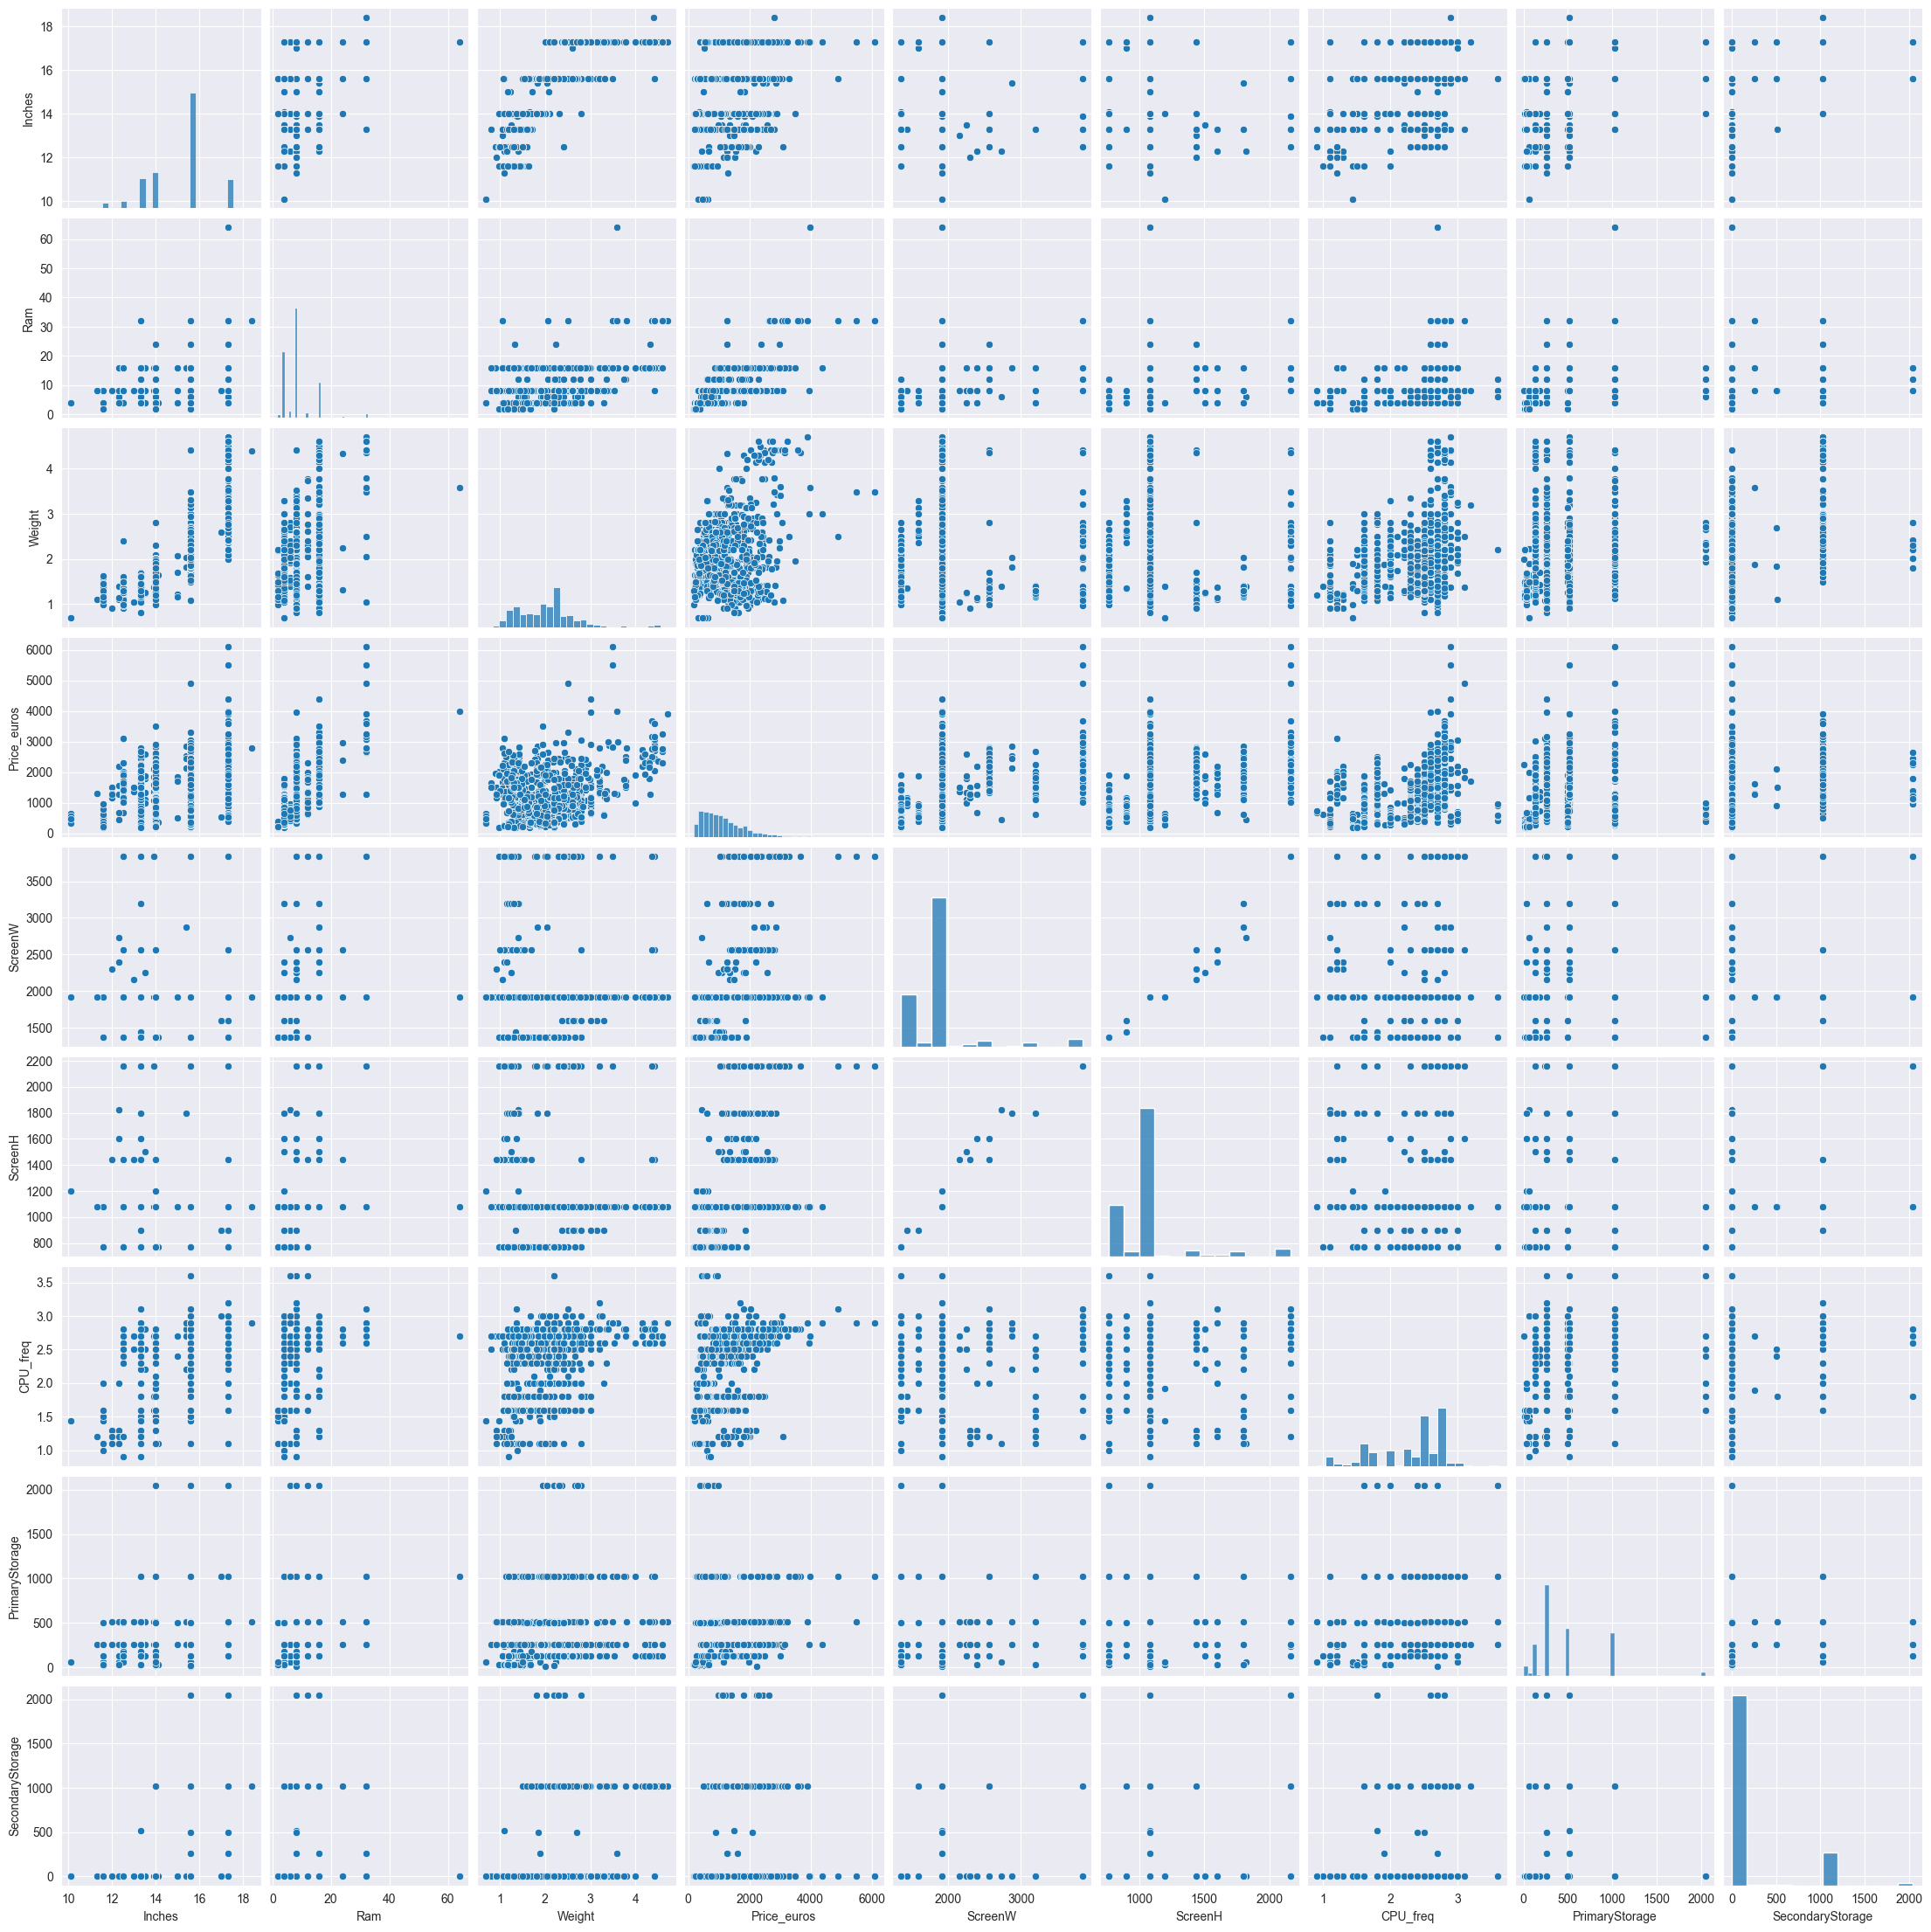

In [9]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

In [10]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [11]:
df.columns.value_counts()

Company                 1
IPSpanel                1
GPU_company             1
SecondaryStorageType    1
PrimaryStorageType      1
SecondaryStorage        1
PrimaryStorage          1
CPU_model               1
CPU_freq                1
CPU_company             1
RetinaDisplay           1
Touchscreen             1
Product                 1
ScreenH                 1
ScreenW                 1
Screen                  1
Price_euros             1
Weight                  1
OS                      1
Ram                     1
Inches                  1
TypeName                1
GPU_model               1
Name: count, dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1270    False
1271    False
1272    False
1273    False
1274    False
Length: 1275, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='Company'>

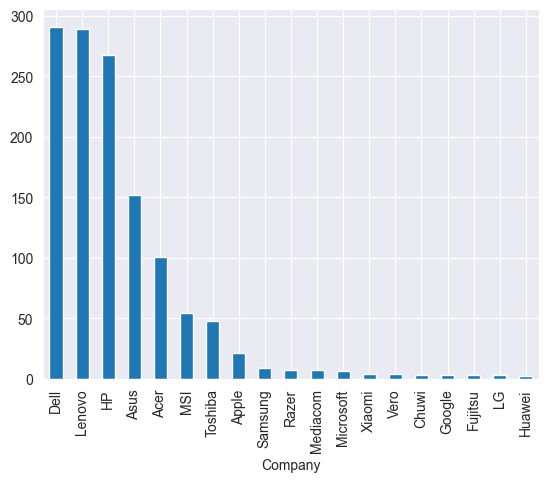

In [15]:
df['Company'].value_counts().plot(kind='bar')

<Axes: ylabel='Company'>

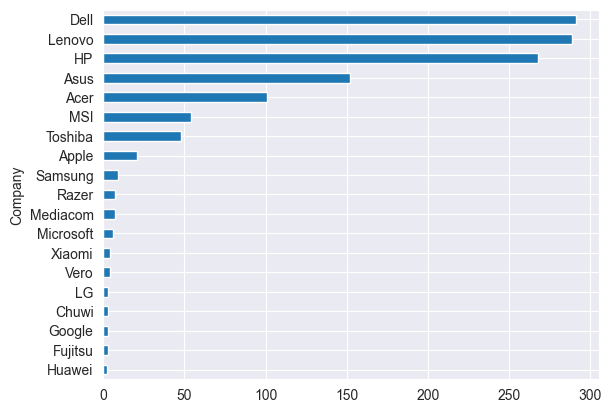

In [16]:
df['Company'].value_counts().sort_values(ascending=True).plot(kind='barh')


In [17]:
df['Product'].value_counts() 

Product
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: count, Length: 618, dtype: int64

<Axes: ylabel='Product'>

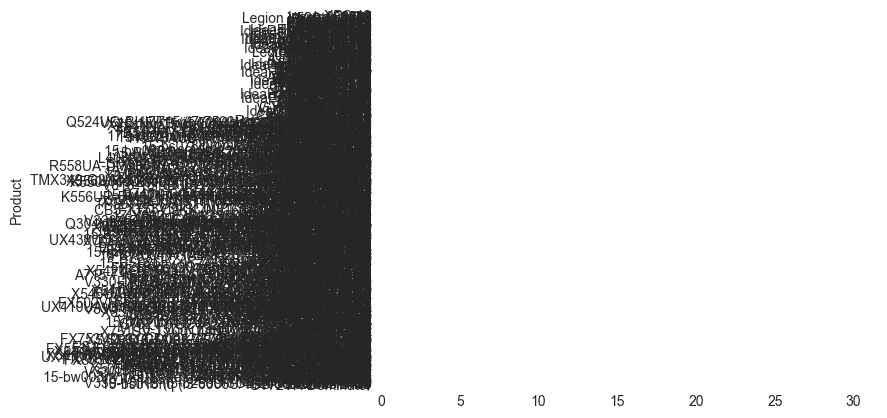

In [18]:
df['Product'].value_counts().sort_values(ascending=True).plot(kind='barh')


<Axes: ylabel='Product'>

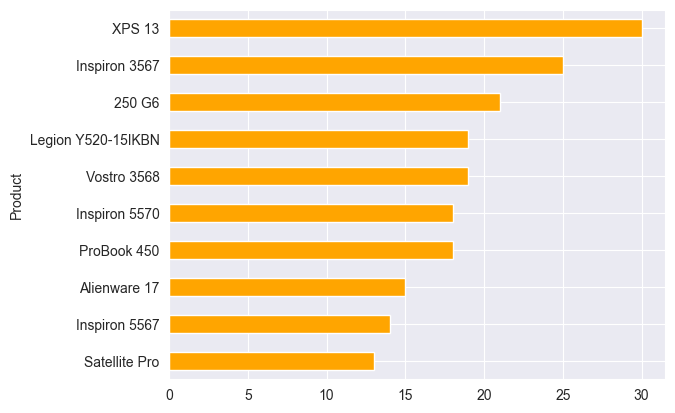

In [19]:
pdf=df['Product'].value_counts().nlargest(10)
pdf.sort_values(ascending=True).plot(kind='barh', color ='orange')

<Axes: ylabel='OS'>

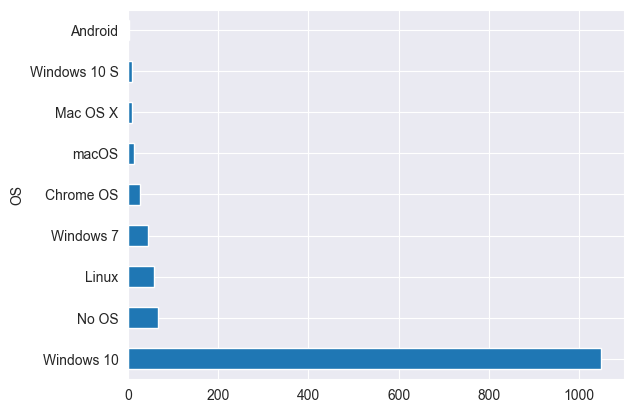

In [20]:
df['OS'].value_counts().sort_values(ascending=False).plot(kind='barh')


<Axes: xlabel='Ram'>

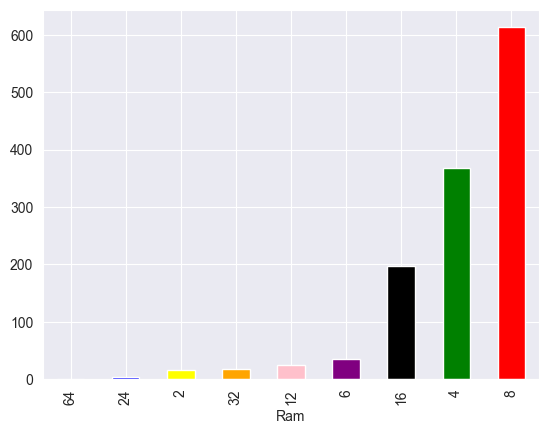

In [21]:
df['Ram'].value_counts().sort_values(ascending=True).plot(kind='bar' , color=['red','blue','yellow','orange','pink','purple','black','green'])


In [22]:
df['Screen'].value_counts() 

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

C:\Users\Divya\AppData\Local\Temp\ipykernel_8996\3336355146.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.stripplot(x='TypeName', y='Screen',hue='Screen', data=df, jitter=True, color='red', alpha=0.7)


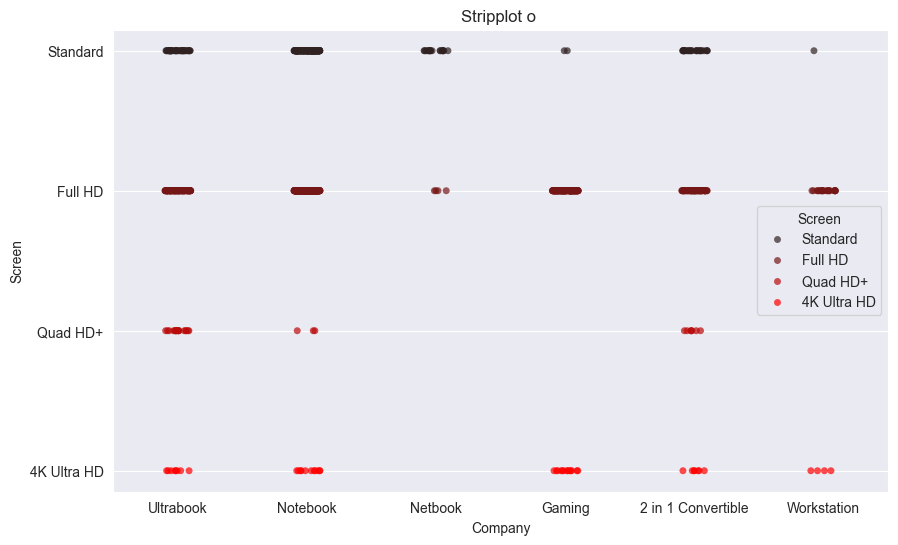

In [23]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='TypeName', y='Screen',hue='Screen', data=df, jitter=True, color='red', alpha=0.7)
plt.title('Stripplot o ')
plt.xlabel('Company')
plt.ylabel('Screen')
plt.show()

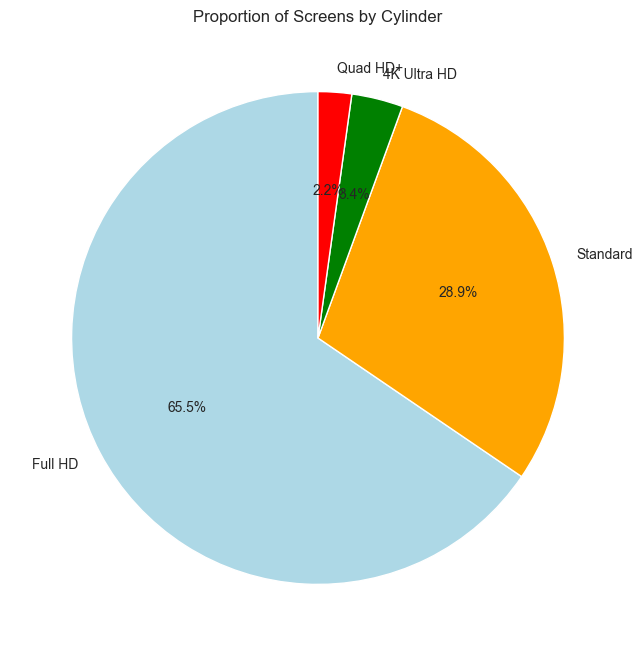

In [24]:
cylinder_counts = df['Screen'].value_counts()
plt.figure(figsize=(8, 8))
cylinder_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'green','red','pink'])
plt.title('Proportion of Screens by Cylinder')
plt.ylabel('')
plt.show()

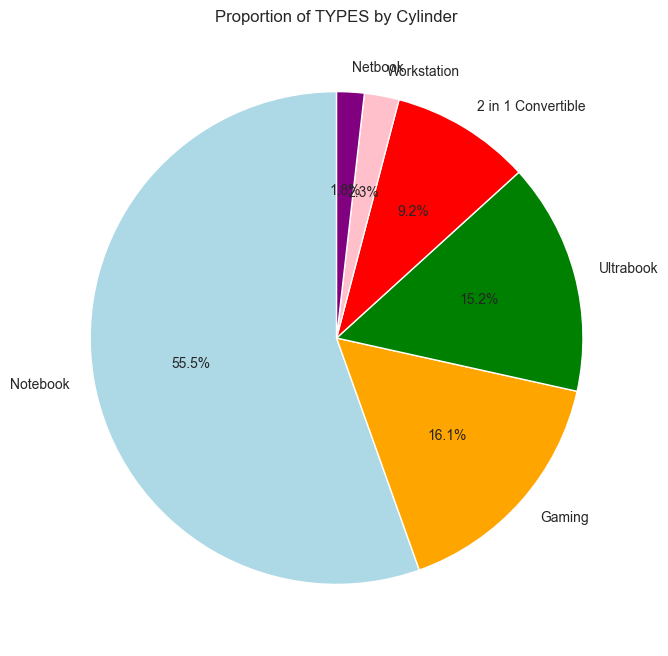

In [25]:
cylinder_counts = df['TypeName'].value_counts()
plt.figure(figsize=(8, 8))
cylinder_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'green','red','pink','purple'])
plt.title('Proportion of TYPES by Cylinder')
plt.ylabel('')
plt.show()

<Axes: xlabel='TypeName'>

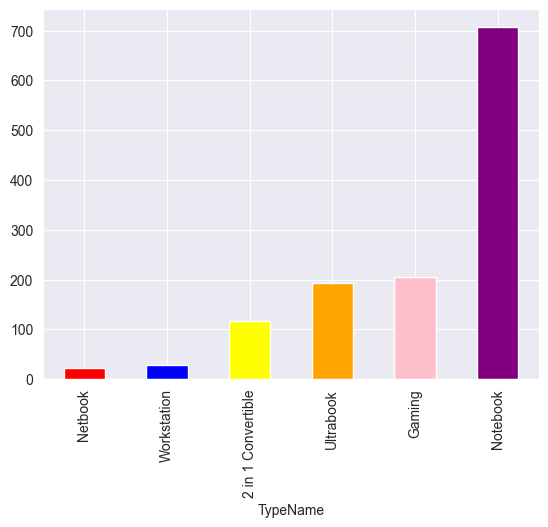

In [26]:
df['TypeName'].value_counts().sort_values(ascending=True).plot(kind='bar' , color=['red','blue','yellow','orange','pink','purple','black','green'])


<Axes: title={'center': 'CPU_company'}, ylabel='count'>

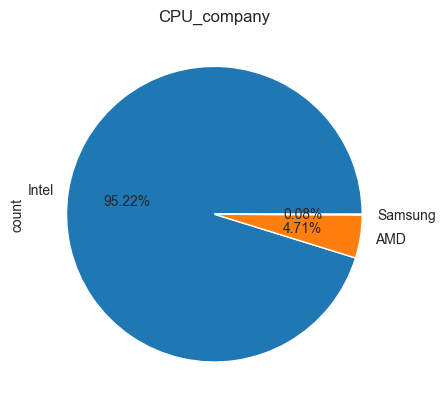

In [27]:
df['CPU_company'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', title = 'CPU_company')


<Axes: title={'center': 'CPU_company'}, ylabel='count'>

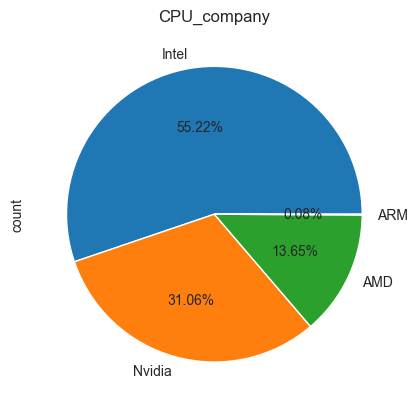

In [28]:
df['GPU_company'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', title = 'CPU_company')


<Axes: xlabel='PrimaryStorageType'>

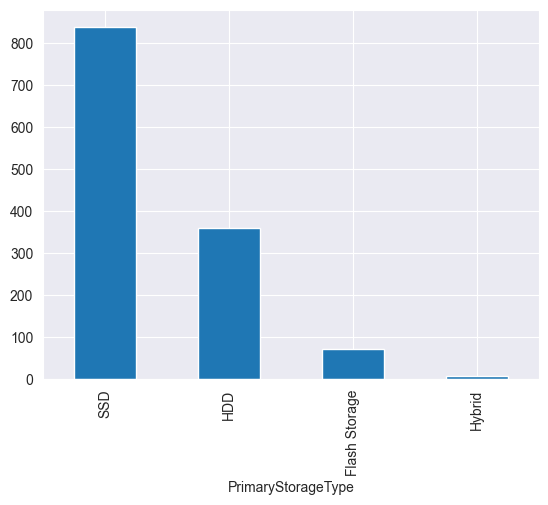

In [29]:
df['PrimaryStorageType'].value_counts().plot(kind='bar')


<Axes: xlabel='SecondaryStorageType'>

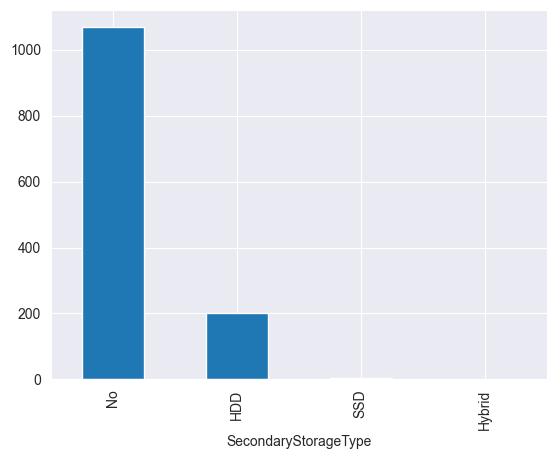

In [30]:
df['SecondaryStorageType'].value_counts().plot(kind='bar')


<Axes: title={'center': 'Touchscreen'}, xlabel='Touchscreen'>

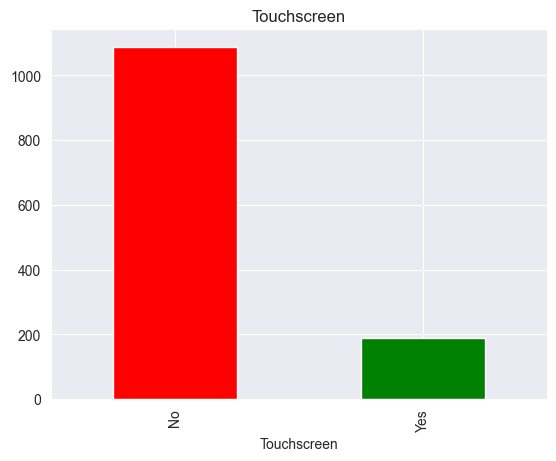

In [31]:
df['Touchscreen'].value_counts().plot(kind = 'bar', title = 'Touchscreen', color =['red','green'])


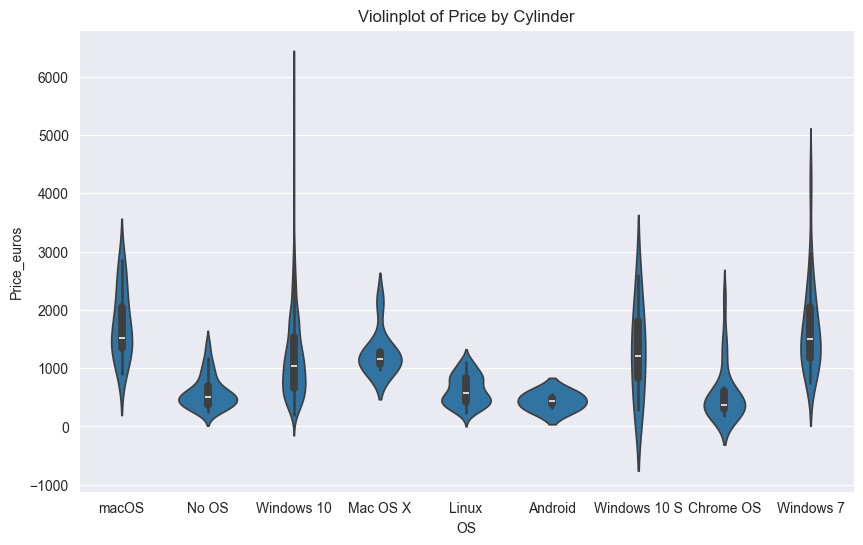

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='OS', y='Price_euros', data=df)
plt.title('Violinplot of Price by Cylinder')
plt.xlabel('OS')
plt.ylabel('Price_euros')
plt.show()


C:\Users\Divya\AppData\Local\Temp\ipykernel_8996\424134158.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.swarmplot(x='OS', y='Price_euros', data=df, color='orange', hue='Touchscreen',alpha=0.7)
C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease t

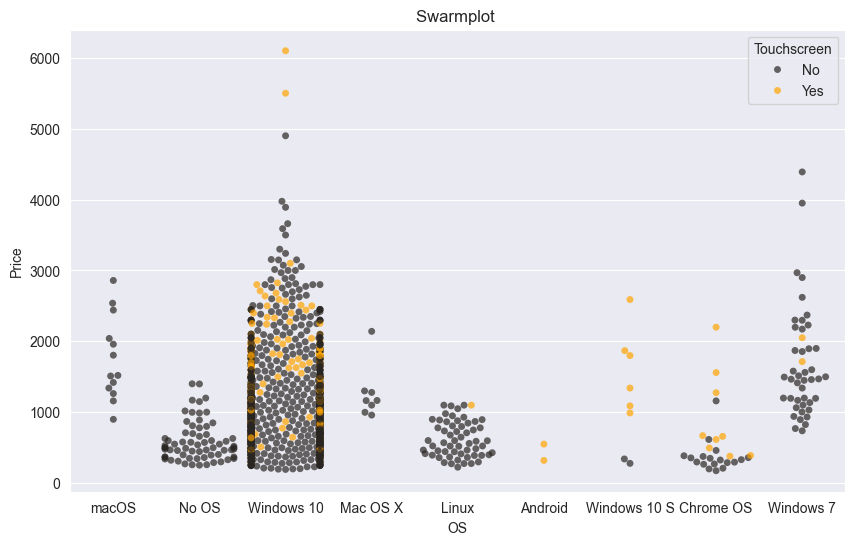

In [33]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='OS', y='Price_euros', data=df, color='orange', hue='Touchscreen',alpha=0.7)
plt.title('Swarmplot ')
plt.xlabel('OS')
plt.ylabel('Price')
plt.show()

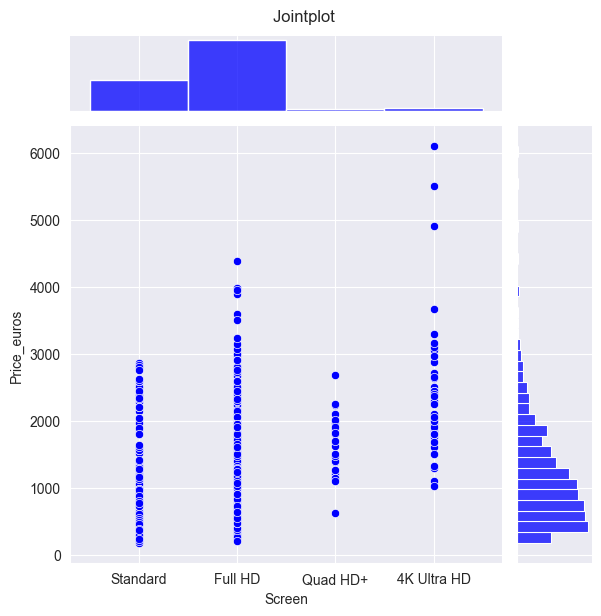

In [34]:
sns.jointplot(x='Screen', y='Price_euros', data=df, kind='scatter', color='blue')
plt.suptitle('Jointplot ', y=1.02) 
plt.show()


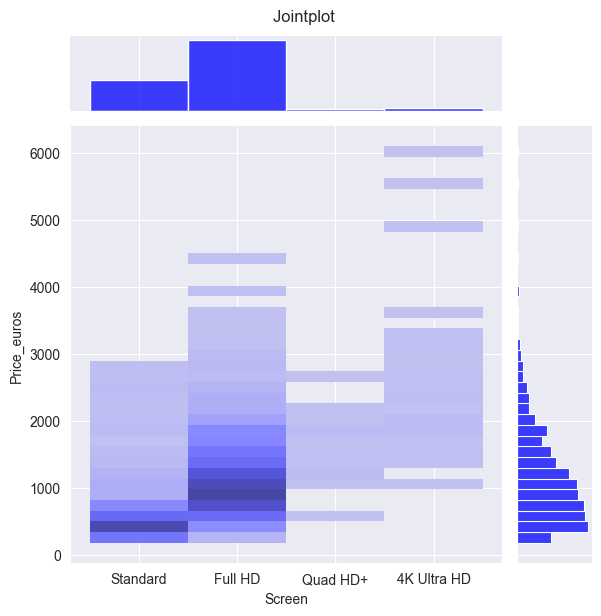

In [35]:
sns.jointplot(x='Screen', y='Price_euros', data=df, kind='hist', color='blue')
plt.suptitle('Jointplot ', y=1.02) 
plt.show()


In [39]:
df = pd.get_dummies(df, columns=['Company','Product','TypeName','OS','Screen','Touchscreen','IPSpanel','RetinaDisplay','CPU_company','CPU_model','PrimaryStorageType','SecondaryStorageType','GPU_company','GPU_model'],drop_first= True)


In [40]:
X= df.drop('Price_euros', axis=1)
y= df['Price_euros']
     


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([   428.69755557,    714.32791506,   1612.16103917,   1221.0964326 ,
         1873.02496515,    807.5824076 ,   1249.22815755,   -880.48366722,
         2443.01444705,    560.36787485,   1338.23135318,    712.86304087,
         1284.99855998,   2364.78939358,   2636.75041913,    765.2126578 ,
         3114.58931713,    988.80827671,   1200.58685935,   2213.52864563,
         1115.00213406, -24230.76313034,   1771.03594199,   2225.73354502,
          764.82531829,   1870.22157764,    931.10931328,    588.27554271,
         1071.23600518,   1127.04678138,    828.29928976,    463.01706775,
         1000.05723407,    358.1074843 ,   1086.42539291,    764.69444098,
          924.72280822,   2136.0142233 ,   1062.0066383 ,   1015.46315752,
         1322.01592416,   1983.69003624,   1028.25693138,   1527.57422329,
          739.5721835 ,   1320.27190197,   1550.20571823,    726.15944282,
         2996.53867167,    774.87952956,   2505.99435121,    520.12436859,
         2502.11834221,  

In [45]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3935205.0195988473


In [46]:

r2 = r2_score(y_test, y_pred)
print(f"R-Squared :{r2}")

R-Squared :-6.9284578505657


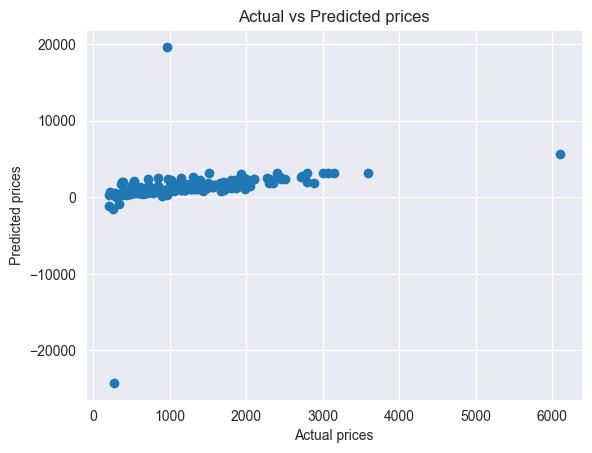

In [47]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()
     

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [50]:
dt =  DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
y_pred_dt = dt.predict(X_test)

In [52]:
y_pred_dt

array([ 742.   ,  902.   , 1650.   ,  629.   , 2250.68 ,  539.95 ,
        689.   ,  347.   , 2029.   ,  829.   ,  739.   ,  959.   ,
        740.   , 2040.   , 1329.   ,  549.   , 2040.   ,  949.   ,
       1799.   , 1426.66 ,  829.   ,  849.   , 1757.42 , 2094.48 ,
        779.   , 2599.   , 1590.   , 1213.   ,  549.99 ,  879.   ,
        770.   ,  488.69 ,  739.   ,  347.   ,  638.99 ,  879.   ,
        959.   ,  572.   , 1349.   ,  959.   , 1299.   ,  304.   ,
       1186.   , 1064.   ,  898.9  ,  999.   , 1499.   , 1590.   ,
       2299.   ,  879.   ,  829.   ,  249.   , 1859.   ,  245.   ,
        690.   , 1629.   , 1590.   , 1349.   , 1486.77 ,  629.   ,
        915.   ,  798.705, 1748.9  ,  447.   ,  850.66 ,  398.   ,
        499.   ,  819.   ,  249.   ,  586.19 , 1129.   ,  979.   ,
       1189.   , 1498.   ,  999.   ,  509.   , 1900.   ,  770.   ,
       1165.   ,  369.   , 1398.   ,  879.   ,  493.   , 1097.   ,
        629.   , 2241.5  ,  549.   ,  859.01 , 1249.26 ,  959.

In [68]:
mse = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 106270.25420480393


In [69]:

r2 = r2_score(y_test, y_pred_dt)
print(f"R-Squared :{r2}")

R-Squared :0.7858919098152654


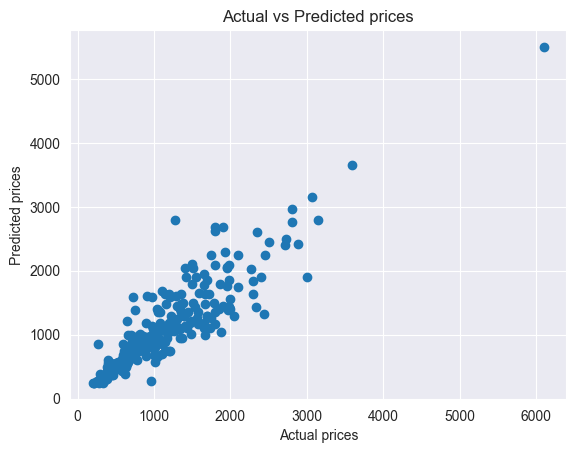

In [70]:

plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()
     

In [57]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [59]:
drf =  RandomForestRegressor(random_state=42)
drf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
y_pred_rf = drf.predict(X_test)

In [62]:
y_pred_rf

array([ 754.6261    ,  898.4688    , 1662.23836667,  739.5849    ,
       1661.1483    ,  599.1511    ,  913.976     ,  332.2999    ,
       2227.49      ,  769.3281    ,  510.2979    , 1171.8311    ,
        935.2966    , 1896.6408    , 2399.15843333,  647.8544    ,
       1443.866     ,  969.25      , 1714.1377    , 1935.8129    ,
        747.4209    ,  420.5125    , 1669.95816667, 1732.0391    ,
        855.4794    , 2481.941     ,  868.609     , 1060.7865    ,
        549.7921    ,  868.70236667,  993.1831    ,  595.17      ,
        736.4583    ,  342.2676    ,  613.939     ,  851.4049    ,
       1019.8493    ,  614.0289    , 1217.0262    , 1030.8605    ,
       1297.1233    ,  351.8344    , 1233.93953333,  946.0612    ,
        960.51703333, 1283.09      , 1636.2215    ,  800.0643    ,
       2211.9619    ,  939.7922    ,  959.3563    ,  253.927     ,
       1787.8707    ,  258.209     ,  766.0881    , 1611.229     ,
       1042.3041    , 1503.329     , 1279.271     ,  725.1469 

In [65]:
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 65869.4667016048


In [66]:

r2 = r2_score(y_test, y_pred_rf)
print(f"R-Squared :{r2}")

R-Squared :0.8672894327533278


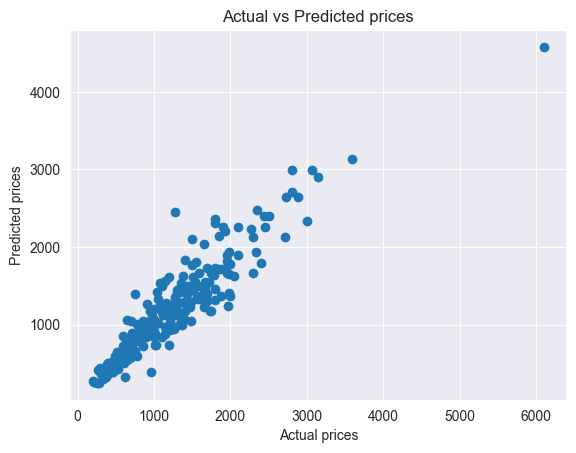

In [67]:

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

In [71]:
from sklearn.linear_model import Ridge


In [74]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_rid = ridge_model.predict(X_test)

In [75]:
y_pred_rid

array([ 517.81517059,  840.90502731, 1513.30132043, 1003.24467417,
       1823.64083336,  758.14177909, 1342.04502525,  261.02533102,
       2360.18328042,  684.46024244, 1082.7880109 ,  831.72054592,
       1150.10801298, 1749.65855237, 2589.48812805,  698.69199731,
       1260.5603538 ,  942.03598685, 1711.5178829 , 2323.34002009,
        740.73967789,  464.47317708, 1728.90131508, 1741.68293129,
       1153.81708707, 2141.04307566,  823.98833089,  665.12979481,
        719.89836026,  911.49362332, 1008.50605641,  552.25435429,
        687.19122323,  371.41437564, 1008.64192285,  855.80991333,
        932.08921542,  560.17303102,  979.63949677, 1087.00535824,
       1367.79726804,  343.30219969, 1215.53853225, 1207.01551106,
        927.14146798, 1217.203648  , 1578.57903096,  741.18330399,
       1737.73458277,  923.85053674, 1113.76054924,  293.45911046,
       2570.78667678,  378.64414155,  791.26063258, 1796.55314666,
       1055.49849868, 1512.3665759 , 1019.56158018,  892.39770

In [76]:
mse = mean_squared_error(y_test, y_pred_rid)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 56932.39421946139


In [77]:
r2 = r2_score(y_test, y_pred_rid)
print(f"R-Squared :{r2}")

R-Squared :0.8852954075701998


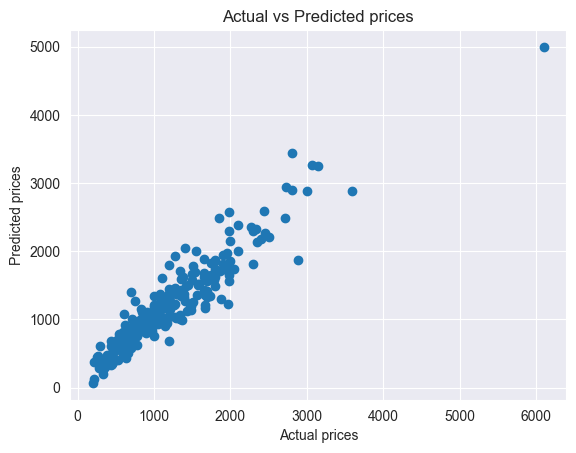

In [78]:
plt.scatter(y_test, y_pred_rid)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [81]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [82]:
y_pred_knn = knn_model.predict(X_test)

In [83]:
y_pred_knn

array([ 759.322,  816.8  , 1521.284,  566.8  , 1965.536,  559.   ,
       1194.   ,  338.138, 1969.126,  662.978,  528.   ,  911.4  ,
       1271.942, 1998.528, 2166.928,  706.202, 1742.88 , 1072.6  ,
       1372.88 , 1385.852,  648.378,  449.654, 1433.084, 1789.454,
        637.8  , 2327.6  ,  998.834,  820.2  ,  793.   ,  937.18 ,
       1248.798,  671.522,  796.882,  680.6  ,  585.986, 1297.35 ,
       1080.804,  607.2  , 1260.2  , 1052.398, 1370.7  ,  375.   ,
       1393.6  ,  941.396, 1017.512, 1176.8  , 1740.   ,  804.   ,
       2340.152,  860.114,  963.948,  270.   , 2075.   ,  231.38 ,
        839.332, 1496.2  , 1125.2  , 1415.18 , 1205.258,  675.58 ,
        829.8  ,  765.656, 1828.6  ,  469.18 ,  766.78 ,  664.   ,
        675.58 , 1047.148,  270.   ,  687.036, 1224.6  , 1431.6  ,
       1131.2  , 1866.4  , 1078.8  ,  489.6  , 2389.198, 1291.368,
       1750.4  ,  458.45 , 1669.6  , 1337.17 ,  534.1  , 1949.2  ,
        799.9  , 1370.7  ,  652.2  , 1458.804, 1894.654,  551.

In [84]:
mse = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 136650.59953578035


In [85]:
r2 = r2_score(y_test, y_pred_knn)
print(f"R-Squared :{r2}")

R-Squared :0.7246830817509957


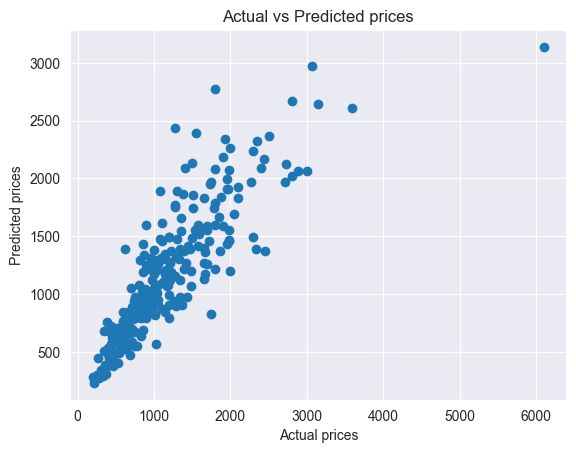

In [87]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()